# Part-A

# KNN Classification

In [1]:
from pandas import read_csv
import numpy as np
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier

In [2]:
#Read the dataset
g = read_csv('glass.csv')
g

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7


In [3]:
#To find whether there are any existing null values or not
g.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   Al      214 non-null    float64
 4   Si      214 non-null    float64
 5   K       214 non-null    float64
 6   Ca      214 non-null    float64
 7   Ba      214 non-null    float64
 8   Fe      214 non-null    float64
 9   Type    214 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 16.8 KB


In [4]:
#Count of duplicated rows
g[g.duplicated()]

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
39,1.52213,14.21,3.82,0.47,71.77,0.11,9.57,0.0,0.0,1


In [5]:
g1=g.drop_duplicates()
g1.head(50)

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.00,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.00,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.00,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.00,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.00,1
5,1.51596,12.79,3.61,1.62,72.97,0.64,8.07,0.00,0.26,1
6,1.51743,13.30,3.60,1.14,73.09,0.58,8.17,0.00,0.00,1
7,1.51756,13.15,3.61,1.05,73.24,0.57,8.24,0.00,0.00,1
8,1.51918,14.04,3.58,1.37,72.08,0.56,8.30,0.00,0.00,1
9,1.51755,13.00,3.60,1.36,72.99,0.57,8.40,0.00,0.11,1


<AxesSubplot:>

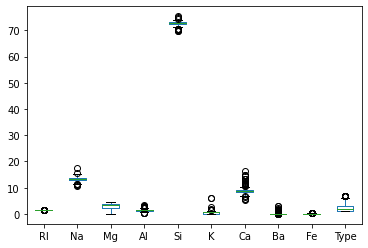

In [6]:
#Outlier Detection
g1.plot(kind='box')

<AxesSubplot:>

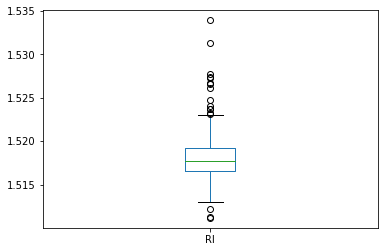

In [7]:
g1.RI.plot(kind='box')

In [8]:
g1.RI.describe()

count    213.000000
mean       1.518348
std        0.003033
min        1.511150
25%        1.516520
50%        1.517680
75%        1.519150
max        1.533930
Name: RI, dtype: float64

In [9]:
IQR = 1.519150 - 1.516520
IQR

0.00262999999999991

In [10]:
#Calculation of lower fence
lower_fence = 1.516520 - (1.5*IQR)
lower_fence

1.5125750000000002

In [11]:
#Calculation of upper fence
upper_fence = 1.519150 + (1.5*IQR)
upper_fence

1.5230949999999999

In [12]:
index=g1[g1.RI<1.5125750000000002].index
g1 = g1.drop(index,axis=0)

In [13]:
index=g1[g1.RI>1.5230949999999999].index
g1 = g1.drop(index,axis=0)

<AxesSubplot:>

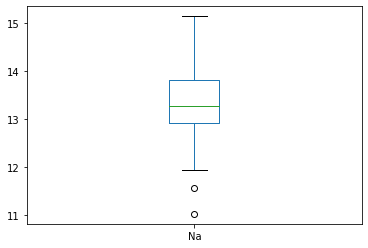

In [14]:
g1.Na.plot(kind='box')

In [15]:
g1.Na.describe()

count    196.000000
mean      13.418010
std        0.699982
min       11.030000
25%       12.930000
50%       13.280000
75%       13.825000
max       15.150000
Name: Na, dtype: float64

In [16]:
IQR = 13.825000 - 12.930000
IQR

0.8949999999999996

In [17]:
#Calculation of lower fence
lower_fence = 12.930000 - (1.5*IQR)
lower_fence

11.5875

In [18]:
#Calculation of upper fence
upper_fence = 13.825000 + (1.5*IQR)
upper_fence

15.167499999999999

In [19]:
index=g1[g1.Na<11.5875].index
g1 = g1.drop(index,axis=0)

In [20]:
index=g1[g1.Na>15.167499999999999].index
g1 = g1.drop(index,axis=0)

<AxesSubplot:>

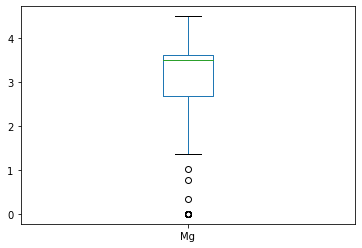

In [21]:
g1.Mg.plot(kind='box')

<AxesSubplot:>

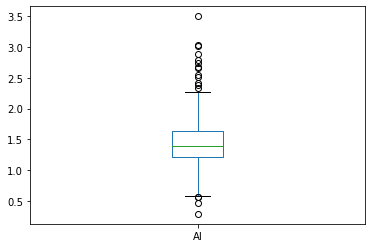

In [22]:
g1.Al.plot(kind='box')

In [23]:
g1.Al.describe()

count    194.000000
mean       1.477577
std        0.487672
min        0.290000
25%        1.210000
50%        1.390000
75%        1.637500
max        3.500000
Name: Al, dtype: float64

In [24]:
IQR = 1.637500 - 1.210000
IQR

0.4275

In [25]:
#Calculation of lower fence
lower_fence = 1.210000 - (1.5*IQR)
lower_fence

0.56875

In [26]:
#Calculation of upper fence
upper_fence = 1.637500 + (1.5*IQR)
upper_fence

2.27875

In [27]:
index=g1[g1.Al<0.56875].index
g1 = g1.drop(index,axis=0)

In [28]:
index=g1[g1.Al>2.27875].index
g1 = g1.drop(index,axis=0)

<AxesSubplot:>

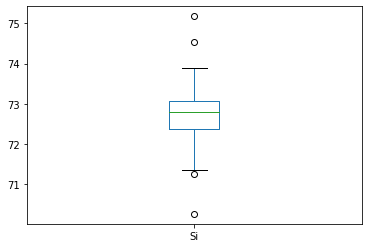

In [29]:
g1.Si.plot(kind='box')

In [30]:
g1.Si.describe()

count    177.000000
mean      72.720282
std        0.591140
min       70.260000
25%       72.380000
50%       72.790000
75%       73.070000
max       75.180000
Name: Si, dtype: float64

In [31]:
IQR = 73.070000 - 72.380000
IQR

0.6899999999999977

In [32]:
#Calculation of lower fence
lower_fence = 72.380000 - (1.5*IQR)
lower_fence

71.345

In [33]:
#Calculation of upper fence
upper_fence = 73.070000 + (1.5*IQR)
upper_fence

74.10499999999999

In [34]:
index=g1[g1.Si<71.345].index
g1 = g1.drop(index,axis=0)

In [35]:
index=g1[g1.Si>74.10499999999999].index
g1 = g1.drop(index,axis=0)

<AxesSubplot:>

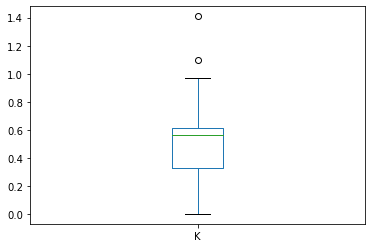

In [36]:
g1.K.plot(kind='box')

In [37]:
g1.K.describe()

count    173.000000
mean       0.462312
std        0.250788
min        0.000000
25%        0.330000
50%        0.560000
75%        0.610000
max        1.410000
Name: K, dtype: float64

In [38]:
IQR = 0.610000 - 0.330000
IQR

0.27999999999999997

In [39]:
#Calculation of upper fence
upper_fence = 0.610000 + (1.5*IQR)
upper_fence

1.0299999999999998

In [40]:
index=g1[g1.K>1.0299999999999998].index
g1 = g1.drop(index,axis=0)

<AxesSubplot:>

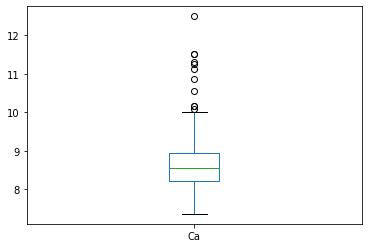

In [41]:
g1.Ca.plot(kind='box')

In [42]:
g1.Ca.describe()

count    171.000000
mean       8.744094
std        0.804941
min        7.360000
25%        8.225000
50%        8.550000
75%        8.945000
max       12.500000
Name: Ca, dtype: float64

In [43]:
IQR = 8.945000 - 8.225000
IQR

0.7200000000000006

In [44]:
#Calculation of lower fence
lower_fence = 8.225000 - (1.5*IQR)
lower_fence

7.144999999999999

In [45]:
#Calculation of upper fence
upper_fence = 8.945000 + (1.5*IQR)
upper_fence

10.025000000000002

In [46]:
index=g1[g1.Ca<7.144999999999999].index
g1 = g1.drop(index,axis=0)

In [47]:
index=g1[g1.Ca>10.025000000000002].index
g1 = g1.drop(index,axis=0)

<AxesSubplot:>

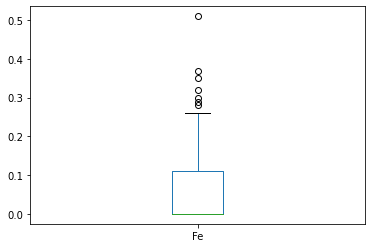

In [48]:
g1.Fe.plot(kind='box')

In [49]:
g1.Fe.describe()

count    160.000000
mean       0.061625
std        0.099684
min        0.000000
25%        0.000000
50%        0.000000
75%        0.110000
max        0.510000
Name: Fe, dtype: float64

In [50]:
IQR = 0.110000 - 0.000000
IQR

0.11

In [51]:
#Calculation of upper fence
upper_fence = 0.110000 + (1.5*IQR)
upper_fence

0.275

In [52]:
index=g1[g1.Fe>0.275].index
g1 = g1.drop(index,axis=0)

<AxesSubplot:>

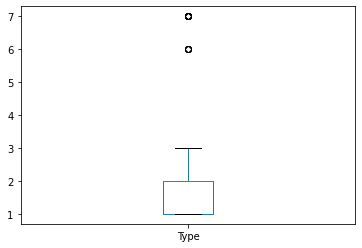

In [53]:
g1.Type.plot(kind='box')

In [54]:
g1.Type.describe()

count    153.000000
mean       2.222222
std        1.721467
min        1.000000
25%        1.000000
50%        2.000000
75%        2.000000
max        7.000000
Name: Type, dtype: float64

In [55]:
IQR = 2.000000 - 1.000000
IQR

1.0

In [56]:
#Calculation of upper fence
upper_fence = 2.000000 + (1.5*IQR)
upper_fence

3.5

In [57]:
index=g1[g1.Type>3.5].index
g1 = g1.drop(index,axis=0)

In [58]:
g1=g1.fillna(1)

In [59]:
array = g1.values
X = array[:, 0:9]
Y = array[:, 9]

In [60]:
X

array([[ 1.52101, 13.64   ,  4.49   , ...,  8.75   ,  0.     ,  0.     ],
       [ 1.51761, 13.89   ,  3.6    , ...,  7.83   ,  0.     ,  0.     ],
       [ 1.51618, 13.53   ,  3.55   , ...,  7.78   ,  0.     ,  0.     ],
       ...,
       [ 1.51796, 13.5    ,  3.36   , ...,  8.81   ,  0.     ,  0.09   ],
       [ 1.51832, 13.33   ,  3.34   , ...,  8.99   ,  0.     ,  0.     ],
       [ 1.51934, 13.64   ,  3.54   , ...,  8.89   ,  0.15   ,  0.24   ]])

In [61]:
Y

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3.])

In [62]:
num_folds = 10
kfold = KFold(n_splits=10)

In [63]:
model = KNeighborsClassifier(n_neighbors=17)
results = cross_val_score(model, X, Y, cv=kfold)
results

array([0.35714286, 0.85714286, 1.        , 0.78571429, 1.        ,
       0.71428571, 0.30769231, 0.61538462, 0.46153846, 0.        ])

In [64]:
print(results.mean())

0.6098901098901099


# Grid Search for Algorithm Tuning

In [65]:
import numpy
from pandas import read_csv
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

In [66]:
n_neighbors = numpy.array(range(1,40,2))
param_grid = dict(n_neighbors=n_neighbors)

In [67]:
model = KNeighborsClassifier()
grid = GridSearchCV(estimator=model, param_grid=param_grid)
grid.fit(X, Y)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31, 33,
       35, 37, 39])})

In [68]:
print(grid.best_score_)
print(grid.best_params_)

0.6621693121693121
{'n_neighbors': 29}


# Visualizing the CV results

In [69]:
from sklearn.model_selection import train_test_split
trainx,testx,trainy,testy = train_test_split(X,Y,test_size = 0.2)

In [70]:
import matplotlib.pyplot as plt 
%matplotlib inline

In [71]:
# choose k between 1 to 40
k_range = range(1,40,2)
k_scores = []
# use iteration to caclulator different k in models, then return the average accuracy based on the cross validation
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X, Y, cv=10)
    k_scores.append(scores.mean())

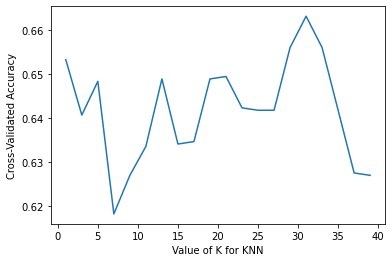

In [72]:
# plot to see clearly
plt.plot(k_range, k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')
plt.show()

# Part-B

# KNN Classification

In [73]:
from pandas import read_csv
import numpy as np
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier

In [74]:
#Read the dataset
z = read_csv('Zoo.csv')
z

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,wallaby,1,0,0,1,0,0,0,1,1,1,0,0,2,1,0,1,1
97,wasp,1,0,1,0,1,0,0,0,0,1,1,0,6,0,0,0,6
98,wolf,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
99,worm,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,7


In [75]:
#To find whether there are any existing null values or not
z.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   animal name  101 non-null    object
 1   hair         101 non-null    int64 
 2   feathers     101 non-null    int64 
 3   eggs         101 non-null    int64 
 4   milk         101 non-null    int64 
 5   airborne     101 non-null    int64 
 6   aquatic      101 non-null    int64 
 7   predator     101 non-null    int64 
 8   toothed      101 non-null    int64 
 9   backbone     101 non-null    int64 
 10  breathes     101 non-null    int64 
 11  venomous     101 non-null    int64 
 12  fins         101 non-null    int64 
 13  legs         101 non-null    int64 
 14  tail         101 non-null    int64 
 15  domestic     101 non-null    int64 
 16  catsize      101 non-null    int64 
 17  type         101 non-null    int64 
dtypes: int64(17), object(1)
memory usage: 14.3+ KB


In [76]:
#Count of duplicated rows
z[z.duplicated()]

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type


<AxesSubplot:>

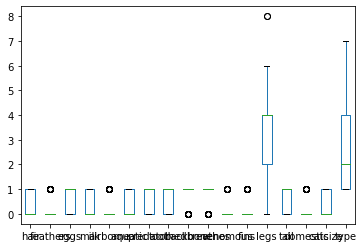

In [77]:
#Outlier Detection
z.plot(kind='box')

<AxesSubplot:>

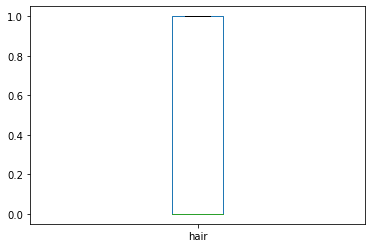

In [78]:
z.hair.plot(kind='box')

<AxesSubplot:>

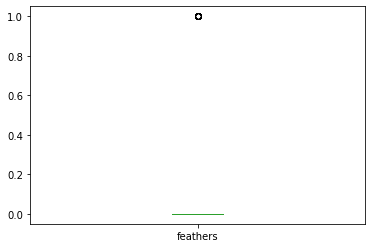

In [79]:
z.feathers.plot(kind='box')

<AxesSubplot:>

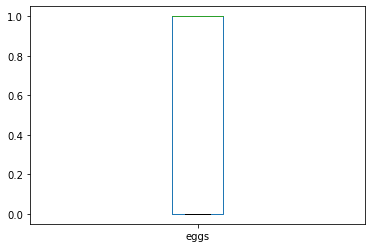

In [80]:
z.eggs.plot(kind='box')

<AxesSubplot:>

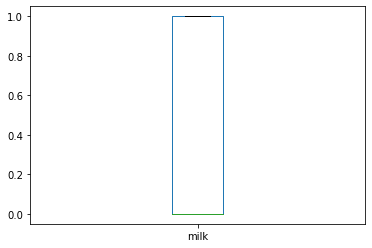

In [81]:
z.milk.plot(kind='box')

<AxesSubplot:>

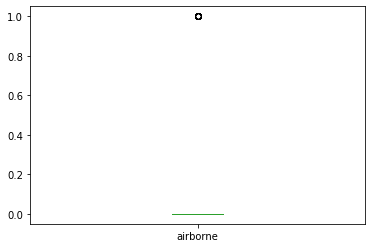

In [82]:
z.airborne.plot(kind='box')

<AxesSubplot:>

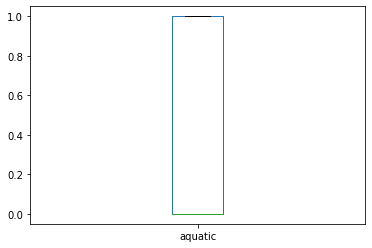

In [83]:
z.aquatic.plot(kind='box')

<AxesSubplot:>

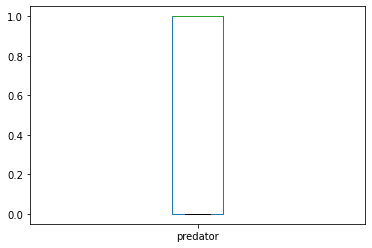

In [84]:
z.predator.plot(kind='box')

<AxesSubplot:>

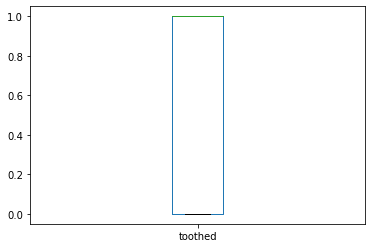

In [85]:
z.toothed.plot(kind='box')

<AxesSubplot:>

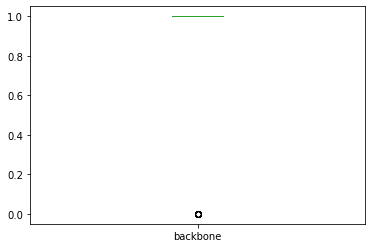

In [86]:
z.backbone.plot(kind='box')

<AxesSubplot:>

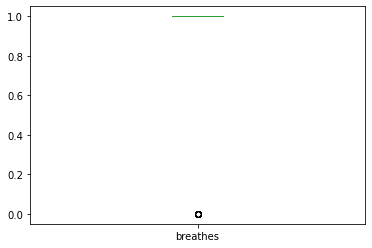

In [87]:
z.breathes.plot(kind='box')

<AxesSubplot:>

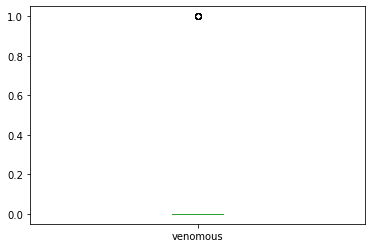

In [88]:
z.venomous.plot(kind='box')

<AxesSubplot:>

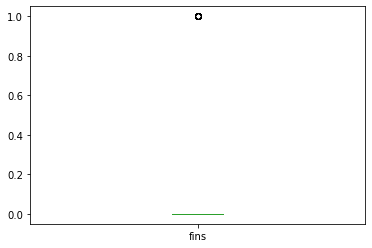

In [89]:
z.fins.plot(kind='box')

<AxesSubplot:>

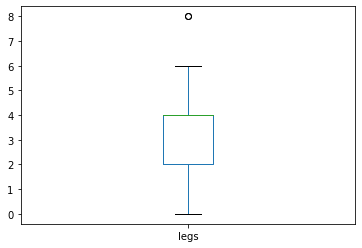

In [90]:
z.legs.plot(kind='box')

In [91]:
z.legs.describe()

count    101.000000
mean       2.841584
std        2.033385
min        0.000000
25%        2.000000
50%        4.000000
75%        4.000000
max        8.000000
Name: legs, dtype: float64

In [92]:
IQR = 4.000000 - 2.000000
IQR

2.0

In [93]:
#Calculation of upper fence
upper_fence = 4.000000 + (1.5*IQR)
upper_fence

7.0

In [94]:
index=z[z.legs>7.0].index
z = z.drop(index,axis=0)

<AxesSubplot:>

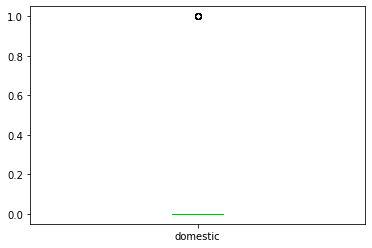

In [95]:
z.domestic.plot(kind='box')

<AxesSubplot:>

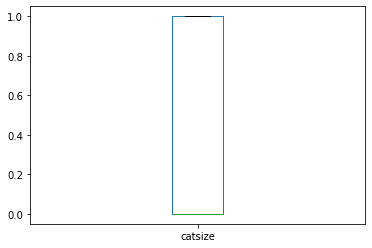

In [96]:
z.catsize.plot(kind='box')

<AxesSubplot:>

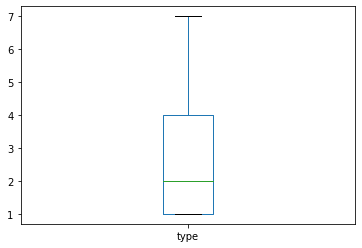

In [97]:
z.type.plot(kind='box')

In [98]:
z1 = z.iloc[:,1:18]
z1

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,1,0,0,1,0,0,0,1,1,1,0,0,2,1,0,1,1
97,1,0,1,0,1,0,0,0,0,1,1,0,6,0,0,0,6
98,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
99,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,7


In [99]:
array = z1.values
X = array[:, 0:16]
Y = array[:,16]

In [100]:
X

array([[1, 0, 0, ..., 0, 0, 1],
       [1, 0, 0, ..., 1, 0, 1],
       [0, 0, 1, ..., 1, 0, 0],
       ...,
       [1, 0, 0, ..., 1, 0, 1],
       [0, 0, 1, ..., 0, 0, 0],
       [0, 1, 1, ..., 1, 0, 0]], dtype=int64)

In [101]:
Y

array([1, 1, 4, 1, 1, 1, 1, 4, 4, 1, 1, 2, 4, 7, 7, 7, 2, 1, 4, 1, 2, 2,
       1, 2, 6, 5, 5, 1, 1, 1, 6, 1, 1, 2, 4, 1, 1, 2, 4, 6, 6, 2, 6, 2,
       1, 1, 7, 1, 1, 1, 1, 6, 5, 1, 1, 2, 2, 2, 2, 4, 4, 3, 1, 1, 1, 1,
       1, 1, 1, 1, 2, 4, 1, 1, 3, 7, 2, 2, 3, 7, 4, 2, 1, 7, 4, 2, 6, 5,
       3, 3, 4, 1, 1, 2, 1, 6, 1, 7, 2], dtype=int64)

In [102]:
num_folds = 10
kfold = KFold(n_splits=10)

In [103]:
model = KNeighborsClassifier(n_neighbors=17)
results = cross_val_score(model, X, Y, cv=kfold)
results

array([1.        , 0.6       , 0.8       , 1.        , 0.9       ,
       0.9       , 0.8       , 0.5       , 0.6       , 0.77777778])

In [104]:
print(results.mean())

0.7877777777777777


# Grid Search for Algorithm Tuning

In [105]:
import numpy
from pandas import read_csv
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

In [106]:
n_neighbors = numpy.array(range(1,40,2))
param_grid = dict(n_neighbors=n_neighbors)

In [107]:
model = KNeighborsClassifier()
grid = GridSearchCV(estimator=model, param_grid=param_grid)
grid.fit(X, Y)

C:\Users\G Saarika\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:670: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"


GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31, 33,
       35, 37, 39])})

In [108]:
print(grid.best_score_)
print(grid.best_params_)

0.9794736842105264
{'n_neighbors': 1}


# Visualizing the CV results

In [109]:
import matplotlib.pyplot as plt 
%matplotlib inline

In [110]:
# choose k between 1 to 40
k_range = range(1,40,2)
k_scores = []
# use iteration to caclulator different k in models, then return the average accuracy based on the cross validation
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X, Y, cv=10)
    k_scores.append(scores.mean())

C:\Users\G Saarika\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:670: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=10.
  warnings.warn(("The least populated class in y has only %d"
C:\Users\G Saarika\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:670: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=10.
  warnings.warn(("The least populated class in y has only %d"
C:\Users\G Saarika\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:670: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=10.
  warnings.warn(("The least populated class in y has only %d"
C:\Users\G Saarika\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:670: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=10.
  warnings.warn(("The least populated class in y has only %d"
C:\Users\G Saarika\anaco

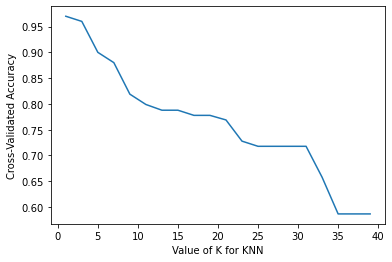

In [111]:
# plot to see clearly
plt.plot(k_range, k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')
plt.show()